# Machine Learning Foundation

## Section 2, Peer-graded Assignment: Course Project

### FIFA 19 complete player dataset: Description

Dataset taken from: [Kaggle](https://www.kaggle.com/karangadiya/fifa19).

File contains 18207 records.

#### Columns:

__Int:__

Age, Overall, Potential, Position, Contract Valid Until.

__Float:__

International Reputation, Weak Foot, Skill Moves, Jersey Number, Crossing, Finishing, Heading, Accuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes.

__Object:__

Nationality, Club, Value, Wage, Preferred Foot, Work Rate, Joined, Loaned From, Height, Weight, LS, ST, RS, LW, LF, CF, RF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB, Release Clause.

### Main objectives

In this assignment models will be focused on prediction of Release Clause.

In [454]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Loading FIFA 19 complete player Data

In [455]:
df = pd.read_csv("data.csv")
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

### Dropping the columns which are hard to interpret or do not make sence for modeling

In [457]:
drop_cols = ['Unnamed: 0', 'ID', 'Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Special', 'Work Rate', 'Body Type', 
             'Real Face', 'Position', 'Jersey Number', 'Loaned From', 'Contract Valid Until', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF',
            'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
            'RCB', 'RB', 'Joined']
df = df.drop(drop_cols, axis=1)
df.head()

,Age,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,31,94,94,€110.5M,€565K,Left,5.0,4.0,4.0,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,33,94,94,€77M,€405K,Right,5.0,4.0,5.0,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,26,92,93,€118.5M,€290K,Right,5.0,5.0,5.0,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,27,91,93,€72M,€260K,Right,4.0,3.0,1.0,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,27,91,92,€102M,€355K,Right,4.0,5.0,4.0,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Checking for null values

In [458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18207 non-null  int64  
 1   Overall                   18207 non-null  int64  
 2   Potential                 18207 non-null  int64  
 3   Value                     18207 non-null  object 
 4   Wage                      18207 non-null  object 
 5   Preferred Foot            18159 non-null  object 
 6   International Reputation  18159 non-null  float64
 7   Weak Foot                 18159 non-null  float64
 8   Skill Moves               18159 non-null  float64
 9   Height                    18159 non-null  object 
 10  Weight                    18159 non-null  object 
 11  Crossing                  18159 non-null  float64
 12  Finishing                 18159 non-null  float64
 13  HeadingAccuracy           18159 non-null  float64
 14  ShortP

__Since the dataset is very big and quantity of null values is relatively small, we can drop the rows with null values.__

In [459]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16643 entries, 0 to 18206
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       16643 non-null  int64  
 1   Overall                   16643 non-null  int64  
 2   Potential                 16643 non-null  int64  
 3   Value                     16643 non-null  object 
 4   Wage                      16643 non-null  object 
 5   Preferred Foot            16643 non-null  object 
 6   International Reputation  16643 non-null  float64
 7   Weak Foot                 16643 non-null  float64
 8   Skill Moves               16643 non-null  float64
 9   Height                    16643 non-null  object 
 10  Weight                    16643 non-null  object 
 11  Crossing                  16643 non-null  float64
 12  Finishing                 16643 non-null  float64
 13  HeadingAccuracy           16643 non-null  float64
 14  ShortP

## Feature Engineering

It can be seen that in columns Value, Wage, Height, Weight and Release Clause values, which should be numbers, are displayed as objects, so transformation of this values should be done. Also, units are changed for columns Height and Weight. They were displayed in inches and pounds respectively, transformed to meters and kilograms.

#### Height

In [460]:
def inches_to_meters(el):
    #r = re.compile(r"([0-9]+)'([0-9]+)")
    #m = r.match(el)
    num = el.split('\'')
    return float(float(num[0]) * 0.3048 + float(num[1]) * 0.0254)

def clear(el):
    return 0

col = df['Height'].apply(inches_to_meters)
df['Height'] = df['Height'].apply(clear)
df['Height'] = df['Height'].astype('float')
df['Height'] = col


In [461]:
df['Height']

0        1.7018
1        1.8796
2        1.7526
3        1.9304
4        1.8034
          ...  
18202    1.7526
18203    1.9050
18204    1.7272
18205    1.7780
18206    1.7780
Name: Height, Length: 16643, dtype: float64

#### Weight

In [462]:
def pounds_to_kilos(el):
    num = el.split('l')
    return float(num[0]) * 0.453592

col = df['Weight'].apply(pounds_to_kilos)
df['Weight'] = df['Weight'].apply(clear)
df['Weight'] = df['Weight'].astype('float')
df['Weight'] = col

In [463]:
df['Weight']

0        72.121128
1        83.007336
2        68.038800
3        76.203456
4        69.853168
           ...    
18202    60.781328
18203    77.110640
18204    67.131616
18205    69.853168
18206    79.832192
Name: Weight, Length: 16643, dtype: float64

#### Value, Wage, Release Clause

In [464]:
import re

def sum_to_float(el):
    non_decimal = re.compile(r'[^\d.]+')
    res = non_decimal.sub('', el)
    if el[-1] == 'M':
        return float(res) * 10 ** 6
    elif el[-1] == 'K':
        return float(res) * 10 ** 3
    
col = df['Value'].apply(sum_to_float)
df['Value'] = df['Value'].apply(clear)
df['Value'] = df['Value'].astype('float')
df['Value'] = col

col = df['Wage'].apply(sum_to_float)
df['Wage'] = df['Wage'].apply(clear)
df['Wage'] = df['Wage'].astype('float')
df['Wage'] = col

col = df['Release Clause'].apply(sum_to_float)
df['Release Clause'] = df['Release Clause'].apply(clear)
df['Release Clause'] = df['Release Clause'].astype('float')
df['Release Clause'] = col

In [465]:
df.head()

,Age,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,31,94,94,110500000.0,565000.0,Left,5.0,4.0,4.0,1.7018,72.121128,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,33,94,94,77000000.0,405000.0,Right,5.0,4.0,5.0,1.8796,83.007336,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,26,92,93,118500000.0,290000.0,Right,5.0,5.0,5.0,1.7526,68.038800,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,27,91,93,72000000.0,260000.0,Right,4.0,3.0,1.0,1.9304,76.203456,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,27,91,92,102000000.0,355000.0,Right,4.0,5.0,4.0,1.8034,69.853168,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


### Preferred Foot feature is not numerical, so it should be encoded.

In [466]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
col = lb.fit_transform(df['Preferred Foot'])
df['Preferred Foot'] = df['Preferred Foot'].apply(clear)
df['Preferred Foot'] = df['Preferred Foot'].astype('int')
df['Preferred Foot'] = col

In [467]:
df.head()

,Age,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,31,94,94,110500000.0,565000.0,0,5.0,4.0,4.0,1.7018,72.121128,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,33,94,94,77000000.0,405000.0,1,5.0,4.0,5.0,1.8796,83.007336,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,26,92,93,118500000.0,290000.0,1,5.0,5.0,5.0,1.7526,68.038800,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,27,91,93,72000000.0,260000.0,1,4.0,3.0,1.0,1.9304,76.203456,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,27,91,92,102000000.0,355000.0,1,4.0,5.0,4.0,1.8034,69.853168,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


## Variable Transformation

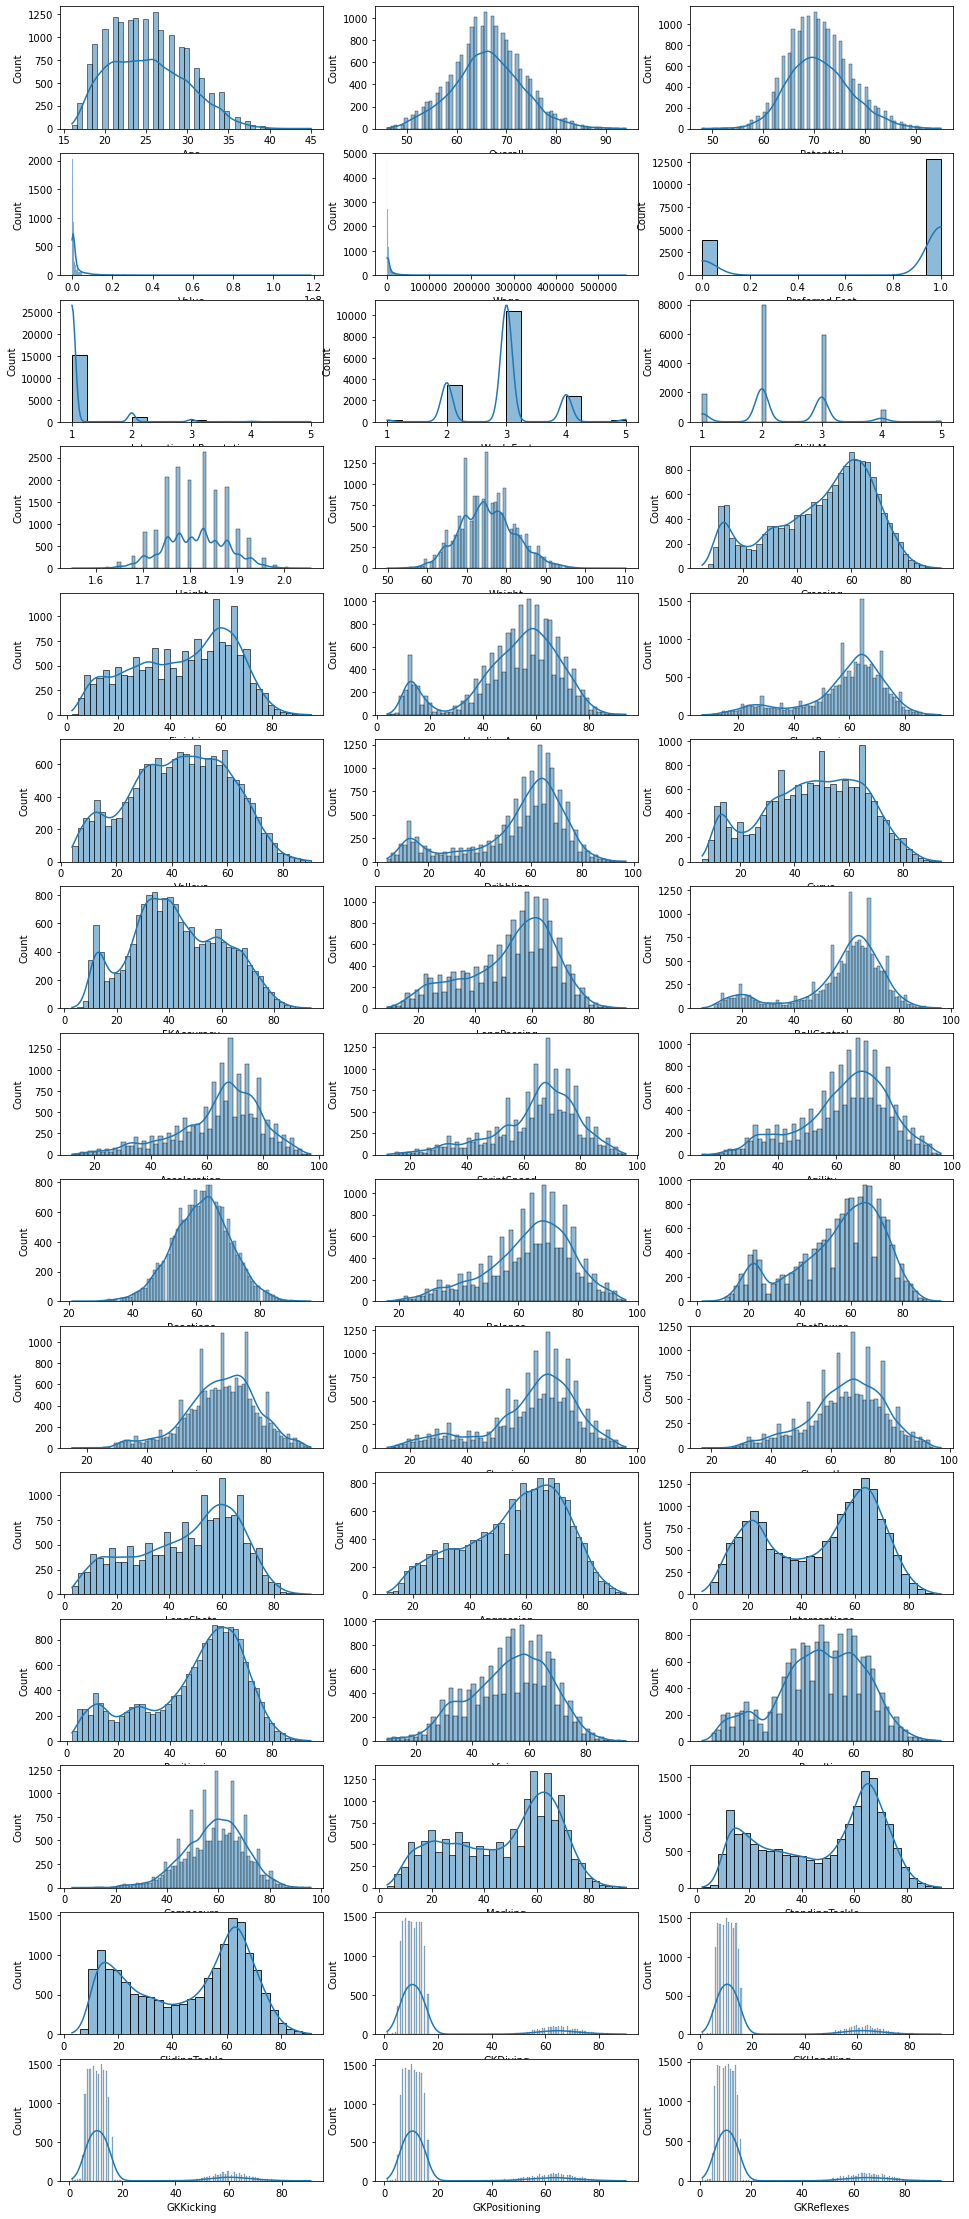

In [468]:
fig, axs = plt.subplots(15, 3, figsize=(16, 40))

for i in range(0, 45):
    sns.histplot(data=df, x=df.columns[i], kde=True, ax=axs[int(i / 3), i % 3])

plt.show()

__It can be seen, that a lot of columns in this data are skewed, so variable transformation was performed.__

In [469]:
numerical = df.drop('Preferred Foot', axis=1).columns

skews = df[numerical].skew()
skews[abs(skews) > 0.75].sort_values(ascending=False)

Wage                        7.969433
Release Clause              7.109884
Value                       7.001447
International Reputation    4.052397
GKPositioning               2.429892
GKReflexes                  2.415941
GKDiving                    2.404571
GKHandling                  2.396700
GKKicking                   2.394872
Acceleration               -0.809496
SprintSpeed                -0.821405
HeadingAccuracy            -0.873530
Stamina                    -0.905806
Dribbling                  -1.065775
ShortPassing               -1.081996
BallControl                -1.247720
dtype: float64

In [470]:
for i in skews[abs(skews) > 0.75].index:
    df[i] = df[i].apply(np.log1p)
    
skews = df[numerical].skew()
skews[abs(skews) > 0.75].sort_values(ascending=False)

International Reputation    3.456117
GKReflexes                  1.556278
GKDiving                    1.546493
GKPositioning               1.529558
GKHandling                  1.517392
GKKicking                   1.497656
Wage                        0.789391
Acceleration               -1.710042
Stamina                    -1.714301
SprintSpeed                -1.723654
HeadingAccuracy            -1.810855
ShortPassing               -1.890058
Dribbling                  -1.898643
BallControl                -2.049565
dtype: float64

In [471]:
df.head()

,Age,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,31,94,94,18.520526,13.244583,0,1.791759,4.0,4.0,1.7018,72.121128,84.0,95.0,4.262680,4.510860,86.0,4.584967,93.0,94.0,87.0,4.574711,4.521789,4.465908,91.0,95.0,95.0,85.0,68.0,4.290459,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,1.945910,2.484907,2.772589,2.708050,2.197225,19.238256
1,33,94,94,18.159316,12.911645,1,1.791759,4.0,5.0,1.8796,83.007336,84.0,94.0,4.499810,4.406719,87.0,4.488636,81.0,76.0,77.0,4.553877,4.499810,4.521789,87.0,96.0,70.0,95.0,95.0,4.488636,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,2.079442,2.484907,2.772589,2.708050,2.484907,18.660485
2,26,92,93,18.590424,12.577640,1,1.791759,5.0,5.0,1.7526,68.038800,79.0,87.0,4.143135,4.442651,84.0,4.574711,88.0,87.0,78.0,4.564348,4.553877,4.510860,96.0,94.0,84.0,80.0,61.0,4.406719,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,2.302585,2.302585,2.772589,2.772589,2.484907,19.245295
3,27,91,93,18.092177,12.468441,1,1.609438,3.0,1.0,1.9304,76.203456,17.0,13.0,3.091042,3.931826,13.0,2.944439,21.0,19.0,51.0,3.761200,4.060443,4.077537,60.0,90.0,43.0,31.0,67.0,3.784190,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,4.510860,4.454347,4.477337,4.488636,4.553877,18.747103
4,27,91,92,18.440483,12.779876,1,1.609438,5.0,4.0,1.8034,69.853168,93.0,82.0,4.025352,4.532599,82.0,4.465908,85.0,83.0,91.0,4.521789,4.369448,4.343805,79.0,91.0,77.0,91.0,63.0,4.510860,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,2.772589,2.639057,1.791759,2.397895,2.639057,19.095664


## Data split

In [472]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(df.drop('Release Clause', axis=1), df['Release Clause'], test_size=0.3, random_state=42)

In [473]:
print('Training set size: ', len(X))
print('Test set size: ', len(X_test))

Training set size:  11650
Test set size:  4993


### Polynomial Features Data Split

It may be usefull to include Polynomial Features, so the second test and validation sets are created.

In [474]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, include_bias=False)
Xpf = pf.fit_transform(df.drop('Release Clause', axis=1))
X_pf, X_test_pf, y_pf, y_test_pf = train_test_split(Xpf, df['Release Clause'], test_size=0.3, random_state=42)

## Linear Regression

1. Vanilla Linear Regression
2. Vanilla Linear Regression with Polynomial Features
3. Vanilla Linear Regression with Scaling
4. Vanilla Linear Regression with Polynomial Features and Scaling

In [475]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score

lr_r2 = {}

lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X_test)
lr_r2['Vanilla Linear Regression'] = {'train: ': r2_score(y, lr.predict(X)), 'test: ': r2_score(y_test, y_pred)}

lr_pf = LinearRegression()
lr_pf.fit(X_pf, y_pf)
y_pred_pf = lr_pf.predict(X_test_pf)
lr_r2['Vanilla Linear Regression with Polynomial Features'] = \
{'train: ': r2_score(y_pf, lr_pf.predict(X_pf)), 'test: ': r2_score(y_test_pf, y_pred_pf)}

In [476]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()

X_s = s.fit_transform(X)
X_test_s = s.transform(X_test)
lr_s = LinearRegression()
lr_s.fit(X_s, y)
y_pred_s = lr_s.predict(X_test_s)
lr_r2['Vanilla Linear Regression with Scaling'] = {'train: ': r2_score(y, lr_s.predict(X_s)), 'test: ': r2_score(y_test, y_pred_s)}

X_pf_s = s.fit_transform(X_pf)
X_test_pf_s = s.transform(X_test_pf)
lr_pf_s = LinearRegression()
lr_pf_s.fit(X_pf_s, y_pf)
y_pred_pf_s = lr_pf_s.predict(X_test_pf_s)
lr_r2['Vanilla Linear Regression with Polynomial Features and Scaling'] = \
{'train: ': r2_score(y_pf, lr_pf_s.predict(X_pf_s)), 'test: ': r2_score(y_test_pf, y_pred_pf_s)}

In [477]:
lr_r2

{'Vanilla Linear Regression': {'train: ': 0.9901955679601401,
  'test: ': 0.9899715379277951},
 'Vanilla Linear Regression with Polynomial Features': {'train: ': 0.9927565611186308,
  'test: ': 0.990994391177948},
 'Vanilla Linear Regression with Scaling': {'train: ': 0.9901955679601401,
  'test: ': 0.9899715379277951},
 'Vanilla Linear Regression with Polynomial Features and Scaling': {'train: ': 0.9927565492595201,
  'test: ': 0.9909945585007169}}

In [481]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_predict

estimator = Pipeline([("polynomial_features", pf),
                      ("scaler", s),
                      ("regression", lr)])
kf = KFold(n_splits=100, random_state=42, shuffle=True)

predictions = cross_val_predict(estimator, X, y, cv=kf)
lr_r2['Linear Regression with Cross Validation(100 splits)'] = r2_score(y, predictions)

In [482]:
lr_r2

{'Vanilla Linear Regression': {'train: ': 0.9901955679601401,
  'test: ': 0.9899715379277951},
 'Vanilla Linear Regression with Polynomial Features': {'train: ': 0.9927565611186308,
  'test: ': 0.990994391177948},
 'Vanilla Linear Regression with Scaling': {'train: ': 0.9901955679601401,
  'test: ': 0.9899715379277951},
 'Vanilla Linear Regression with Polynomial Features and Scaling': {'train: ': 0.9927565492595201,
  'test: ': 0.9909945585007169},
 'Linear Regression with Cross Validation(10 splits)': 0.9910068079914959,
 'Linear Regression with Cross Validation(100 splits)': 0.9910849469574431}

__The dataframe with 16000 rows and 45 cols gives very good results, which are hard to interpret. Let's leave only 500 rows in the dataframe and see what happens.__

In [578]:
df.shape

(16643, 46)

In [579]:
np.random.seed(10)

remove_n = 16143
drop_indices = np.random.choice(df.index, remove_n, replace=False)
df1 = df.drop(drop_indices) 

X, X_test, y, y_test = train_test_split(df1.drop('Release Clause', axis=1), df1['Release Clause'], test_size=0.3, random_state=42)

In [580]:
len(X) + len(X_test)

500

In [581]:
pf = PolynomialFeatures(degree=2, include_bias=False)
Xpf = pf.fit_transform(df1.drop('Release Clause', axis=1))
X_pf, X_test_pf, y_pf, y_test_pf = train_test_split(Xpf, df1['Release Clause'], test_size=0.3, random_state=42)

In [582]:
lr_r2 = {}

lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X_test)
lr_r2['Vanilla Linear Regression'] = {'train: ': r2_score(y, lr.predict(X)), 'test: ': r2_score(y_test, y_pred)}

lr_pf = LinearRegression()
lr_pf.fit(X_pf, y_pf)
y_pred_pf = lr_pf.predict(X_test_pf)
lr_r2['Vanilla Linear Regression with Polynomial Features'] = \
{'train: ': r2_score(y_pf, lr_pf.predict(X_pf)), 'test: ': r2_score(y_test_pf, y_pred_pf)}

In [583]:
s = StandardScaler()

X_s = s.fit_transform(X)
X_test_s = s.transform(X_test)
lr_s = LinearRegression()
lr_s.fit(X_s, y)
y_pred_s = lr_s.predict(X_test_s)
lr_r2['Vanilla Linear Regression with Scaling'] = {'train: ': r2_score(y, lr_s.predict(X_s)), 'test: ': r2_score(y_test, y_pred_s)}

X_pf_s = s.fit_transform(X_pf)
X_test_pf_s = s.transform(X_test_pf)
lr_pf_s = LinearRegression()
lr_pf_s.fit(X_pf_s, y_pf)
y_pred_pf_s = lr_pf_s.predict(X_test_pf_s)
lr_r2['Vanilla Linear Regression with Polynomial Features and Scaling'] = \
{'train: ': r2_score(y_pf, lr_pf_s.predict(X_pf_s)), 'test: ': r2_score(y_test_pf, y_pred_pf_s)}

In [584]:
lr_r2

{'Vanilla Linear Regression': {'train: ': 0.9914384019862469,
  'test: ': 0.9863597499227424},
 'Vanilla Linear Regression with Polynomial Features': {'train: ': 1.0,
  'test: ': 0.8715695229183664},
 'Vanilla Linear Regression with Scaling': {'train: ': 0.9914384019862469,
  'test: ': 0.9863597499227429},
 'Vanilla Linear Regression with Polynomial Features and Scaling': {'train: ': 1.0,
  'test: ': 0.9769783227692482}}

__It can be seen that models with polynomial features are overfitting, because train set R^2 score is higher than test one. Let's use cross validation to see more realistic results.__

In [585]:
estimator = Pipeline([("scaler", s),
                      ("regression", lr)])
kf = KFold(n_splits=5, random_state=42, shuffle=True)

predictions = cross_val_predict(estimator, X, y, cv=kf)
lr_r2['Linear Regression with Cross Validation(5 splits)'] = r2_score(y, predictions)

In [586]:
estimator = Pipeline([("polynomial_features", pf),
                      ("scaler", s),
                      ("regression", lr)])
kf = KFold(n_splits=5, random_state=42, shuffle=True)

predictions = cross_val_predict(estimator, X, y, cv=kf)
lr_r2['Linear Regression with Polynomial Features with Cross Validation(5 splits)'] = r2_score(y, predictions)

In [587]:
lr_r2

{'Vanilla Linear Regression': {'train: ': 0.9914384019862469,
  'test: ': 0.9863597499227424},
 'Vanilla Linear Regression with Polynomial Features': {'train: ': 1.0,
  'test: ': 0.8715695229183664},
 'Vanilla Linear Regression with Scaling': {'train: ': 0.9914384019862469,
  'test: ': 0.9863597499227429},
 'Vanilla Linear Regression with Polynomial Features and Scaling': {'train: ': 1.0,
  'test: ': 0.9769783227692482},
 'Linear Regression with Cross Validation(5 splits)': 0.9878574341726118,
 'Linear Regression with Polynomial Features with Cross Validation(5 splits)': 0.9634366277778773}

__Results are obviously still very good, but there is less overfitting due to cross validation.__

## Ridge Regression
1. Ridge Regression
2. Ridge Regression with Polynomial Features

In [588]:
alphas = np.geomspace(1e-9, 1e0, num=10)

In [589]:
scores = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    estimator = Pipeline([
        ("scaler", s),
        ("ridge_regression", ridge)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)

In [590]:
list(zip(alphas,scores))

[(1e-09, 0.9878574341730127),
 (1e-08, 0.987857434176622),
 (1e-07, 0.9878574342127148),
 (1e-06, 0.9878574345736413),
 (1e-05, 0.9878574381828384),
 (0.0001, 0.9878574742680022),
 (0.001, 0.9878578344391398),
 (0.01, 0.9878613684557639),
 (0.1, 0.9878902790091024),
 (1.0, 0.9877685864054522)]

In [591]:
ridge_r2 = {'Ridge Regression': np.max(scores)}

In [592]:
scores = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    estimator = Pipeline([("polynomial_features", pf),
        ("scaler", s),
        ("ridge_regression", ridge)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)

In [593]:
list(zip(alphas,scores))

[(1e-09, 0.9634320950921806),
 (1e-08, 0.9634320958629637),
 (1e-07, 0.9634321035706362),
 (1e-06, 0.9634321806471983),
 (1e-05, 0.9634329513795822),
 (0.0001, 0.9634406554056443),
 (0.001, 0.9635173674820446),
 (0.01, 0.9642531716513038),
 (0.1, 0.9694763187659647),
 (1.0, 0.9811014009902558)]

In [594]:
ridge_r2['Ridge Regression with Polynomial Features'] = np.max(scores)

In [595]:
ridge_r2

{'Ridge Regression': 0.9878902790091024,
 'Ridge Regression with Polynomial Features': 0.9811014009902558}

## Lasso Regression
1. Lasso Regression
2. Lasso Regression with Polynomial Features

In [596]:
scores = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("lasso_regression", lasso)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)

In [597]:
list(zip(alphas,scores))

[(1e-09, 0.9878574349614276),
 (1e-08, 0.9878574419968292),
 (1e-07, 0.9878575120072929),
 (1e-06, 0.9878581877966448),
 (1e-05, 0.9878649416454437),
 (0.0001, 0.9879259811014094),
 (0.001, 0.9882822181382293),
 (0.01, 0.9882903447957102),
 (0.1, 0.9812068378635117),
 (1.0, 0.43372426322109825)]

In [598]:
lasso_r2 = {'Lasso Regression': np.max(scores)}

In [599]:
scores = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([("polynomial_features", pf),
        ("scaler", s),
        ("lasso_regression", lasso)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)

C:\Users\annra\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05264022360052778, tolerance: 0.0483867471301115
  model = cd_fast.enet_coordinate_descent(


In [600]:
list(zip(alphas,scores))

[(1e-09, 0.9636445962257307),
 (1e-08, 0.9636443520796902),
 (1e-07, 0.9636624674197594),
 (1e-06, 0.9638416088807104),
 (1e-05, 0.9598172873965963),
 (0.0001, 0.9742868196117475),
 (0.001, 0.9871758434743151),
 (0.01, 0.988468824060739),
 (0.1, 0.9815647122084287),
 (1.0, 0.43372426322109814)]

In [601]:
lasso_r2['Lasso Regression with Polynomial Features'] = np.max(scores)

In [602]:
lasso_r2

{'Lasso Regression': 0.9882903447957102,
 'Lasso Regression with Polynomial Features': 0.988468824060739}

## Results

In [604]:
lr_r2

{'Vanilla Linear Regression': {'train: ': 0.9914384019862469,
  'test: ': 0.9863597499227424},
 'Vanilla Linear Regression with Polynomial Features': {'train: ': 1.0,
  'test: ': 0.8715695229183664},
 'Vanilla Linear Regression with Scaling': {'train: ': 0.9914384019862469,
  'test: ': 0.9863597499227429},
 'Vanilla Linear Regression with Polynomial Features and Scaling': {'train: ': 1.0,
  'test: ': 0.9769783227692482},
 'Linear Regression with Cross Validation(5 splits)': 0.9878574341726118,
 'Linear Regression with Polynomial Features with Cross Validation(5 splits)': 0.9634366277778773}

In [606]:
ridge_r2

{'Ridge Regression': 0.9878902790091024,
 'Ridge Regression with Polynomial Features': 0.9811014009902558}

In [607]:
lasso_r2

{'Lasso Regression': 0.9882903447957102,
 'Lasso Regression with Polynomial Features': 0.988468824060739}

__It's obvious that all the models work well for chosen dataframe. But there are some conclusions that can be done from these results.__

* Models without cross validation are highly likely to overfit on this dataframe.
* In Linear Regression Scaling doesn't sighnificantly influence the model.
* Polynomial Features are making predictions worse for this model in general.
* __Lasso Regression does accomplish the best results for this dataframe.__

## Next steps

This dataset has a lot of features and a lot of records, so I think it will be suitable for training more complex models, which may give more interesting results.